In [2]:
import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import ascii

tbl = ascii.read("simple_table.txt")
tbl

name,ra,dec
str6,str10,str9
str6,str10,str9
BLG100,17:51:00.0,-29:59:48
BLG101,17:53:40.2,-29:49:52
BLG102,17:56:20.2,-29:30:51
BLG103,17:56:20.2,-30:06:22


In [3]:
tbl["ra"]

str10
17:51:00.0
17:53:40.2
17:56:20.2
17:56:20.2


In [6]:
import astropy.coordinates as coord
import astropy.units as u

first_row = tbl[1] # get the first (0th) row
ra = coord.Angle(first_row["ra"], unit=u.hour) # create an Angle object
ra.degree # convert to degrees

267.75

In [5]:
tbl = ascii.read("Young-Objects-Compilation.csv")
tbl.colnames

['col1',
 'col2',
 'col3',
 'col4',
 'col5',
 'col6',
 'col7',
 'col8',
 'col9',
 'col10',
 'col11',
 'col12',
 'col13',
 'col14',
 'col15',
 'col16',
 'col17',
 'col18',
 'col19',
 'col20',
 'col21',
 'col22',
 'col23',
 'col24',
 'col25',
 'col26',
 'col27',
 'col28',
 'col29',
 'col30',
 'col31',
 'col32',
 'col33',
 'col34']

In [6]:
tbl[0]

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34
str24,str25,str9,str6,str16,str5,str5,str5,str5,str5,str15,str6,str5,str6,str5,str6,str4,str6,str13,str14,str26,str23,str11,str9,str12,str10,str8,str6,str22,str6,str19,str23,str9,str38
--,--,--,--,2MASS Photometry,--,--,--,--,--,WISE Photometry,--,--,--,--,--,--,--,Spectra,--,--,--,Astrometry,--,--,--,--,--,--,--,--,--,--,--


In [7]:
tbl = ascii.read("Young-Objects-Compilation.csv", header_start=1)
tbl.colnames

['Name',
 'Designation',
 'RA',
 'Dec',
 'Jmag',
 'J_unc',
 'Hmag',
 'H_unc',
 'Kmag',
 'K_unc',
 'W1',
 'W1_unc',
 'W2',
 'W2_unc',
 'W3',
 'W3_unc',
 'W4',
 'W4_unc',
 'Spectral Type',
 'Spectra (FITS)',
 'Opt Spec Refs',
 'NIR Spec Refs',
 'pm_ra (mas)',
 'pm_ra_unc',
 'pm_dec (mas)',
 'pm_dec_unc',
 'pi (mas)',
 'pi_unc',
 'radial velocity (km/s)',
 'rv_unc',
 'Astrometry Refs',
 'Discovery Refs',
 'Group/Age',
 'Note']

In [9]:
tbl = ascii.read("Young-Objects-Compilation.csv", header_start=1, data_start=2)
print(tbl['RA'])

    RA   
---------
  1.01201
  6.92489
  8.23267
  9.42942
 11.33929
       --
       --
       --
 21.19163
  21.5275
      ...
300.20171
       --
303.46467
   321.71
       --
       --
332.05679
333.43715
342.47273
       --
350.72079
Length = 64 rows


In [10]:
tbl['RA'].filled(np.nan)

1.01201
6.92489
8.23267
9.42942
11.33929
nan
nan
nan
21.19163
21.5275
25.49263


Text(0, 0.5, '$J$')

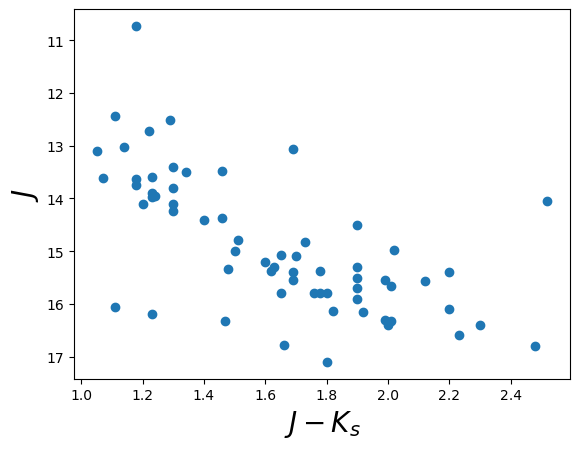

In [12]:
data = ascii.read("Young-Objects-Compilation.csv", header_start=1, data_start=2)

plt.scatter(data["Jmag"] - data["Kmag"], data["Jmag"]) # plot J-K vs. J
plt.ylim(reversed(plt.ylim())) # flip the y-axis
plt.xlabel("$J-K_s$", fontsize=20)
plt.ylabel("$J$", fontsize=20)

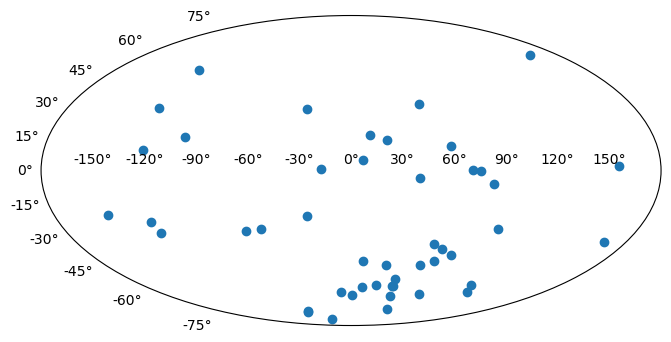

In [14]:
import astropy.coordinates as coord
import astropy.units as u

ra = coord.Angle(data['RA'].filled(np.nan)*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(data['Dec'].filled(np.nan)*u.degree)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)

Text(0, 0.5, '$J$')

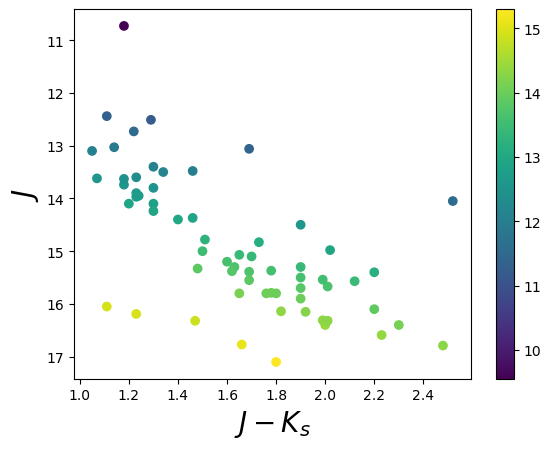

In [23]:
data = ascii.read("Young-Objects-Compilation.csv", header_start=1, data_start=2)

plt.scatter(data["Jmag"] - data["Kmag"], data["Jmag"],c=data['Kmag']) # plot J-K vs. J
plt.ylim(reversed(plt.ylim())) # flip the y-axis
plt.colorbar()
plt.xlabel("$J-K_s$", fontsize=20)
plt.ylabel("$J$", fontsize=20)

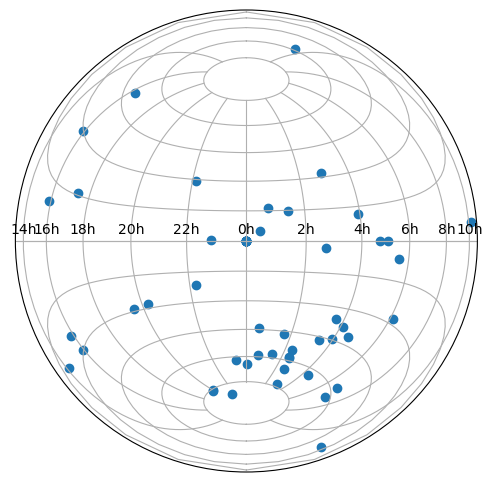

In [21]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="lambert")
ax.scatter(ra.radian, dec.radian)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)